In [37]:
%load_ext autoreload

# Enable autoreload for all modules
%autoreload 2

import numpy as np
from skimage import measure, morphology
import matplotlib.pyplot as plt

from loader import data_loader

#package to read .png files
from PIL import Image
import os 
from skimage.morphology import skeletonize
from graph_plotting import graph_2D


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
gen_void_graph = data_loader.VoidGraphGenerator("/media/data/alex_johannes/octa_data/segs", "/media/data/alex_johannes/octa_data/void_graphs")
gen_void_graph.save_region_graphs()

/home/alex_johannes/octa_gnn/OCTA_gnn/loader/data_loader.py:372: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  # remove all the labels that contain less than 9 pixels


8498 1405
pred_10301.png
7597 1442
pred_10302.png
8532 1364
pred_10303.png
6668 1035
pred_10304.png
7338 1193
pred_10305.png
1018 221
pred_10306.png
7733 1221
pred_10307.png
7428 1371
pred_10308.png
7997 1251
pred_10309.png
5706 1162
pred_10310.png
4000 764
pred_10311.png
8066 1388
pred_10312.png
8321 1380
pred_10313.png
6783 1081
pred_10314.png
6485 1184
pred_10315.png
5415 891
pred_10316.png
1192 291
pred_10317.png
7827 1314
pred_10318.png
7487 1230
pred_10319.png
8605 1329
pred_10320.png
8051 1399
pred_10321.png
5540 1144
pred_10322.png
7849 1307
pred_10323.png
8313 1412
pred_10324.png
6724 1198
pred_10325.png
8424 1351
pred_10326.png
8184 1298
pred_10327.png
7896 1272
pred_10328.png
8494 1366
pred_10329.png
7282 1183
pred_10330.png
8944 1423
pred_10331.png
7247 1269
pred_10332.png
7977 1246
pred_10333.png
9159 1417
pred_10334.png
1075 277
pred_10335.png
7238 1193
pred_10336.png
6262 1150
pred_10337.png
7275 1329
pred_10338.png
7514 1265
pred_10339.png
8276 1194
pred_10340.png
8426 

In [5]:
seg = Image.open(os.path.join("/media/data/alex_johannes/octa_data/segs", "pred_10301.png"))
seg = np.array(seg)
seg = seg.astype(np.uint8)

/tmp/ipykernel_27698/2452019217.py:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  skeleton = skeletonize(morphology.remove_small_holes(seg, area_threshold=9, connectivity=1).astype("uint8"))


uint8


/tmp/ipykernel_27698/2452019217.py:17: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  region_labels = measure.label(morphology.remove_small_holes(seg, area_threshold=9, connectivity=1).astype("uint8"), background=1)


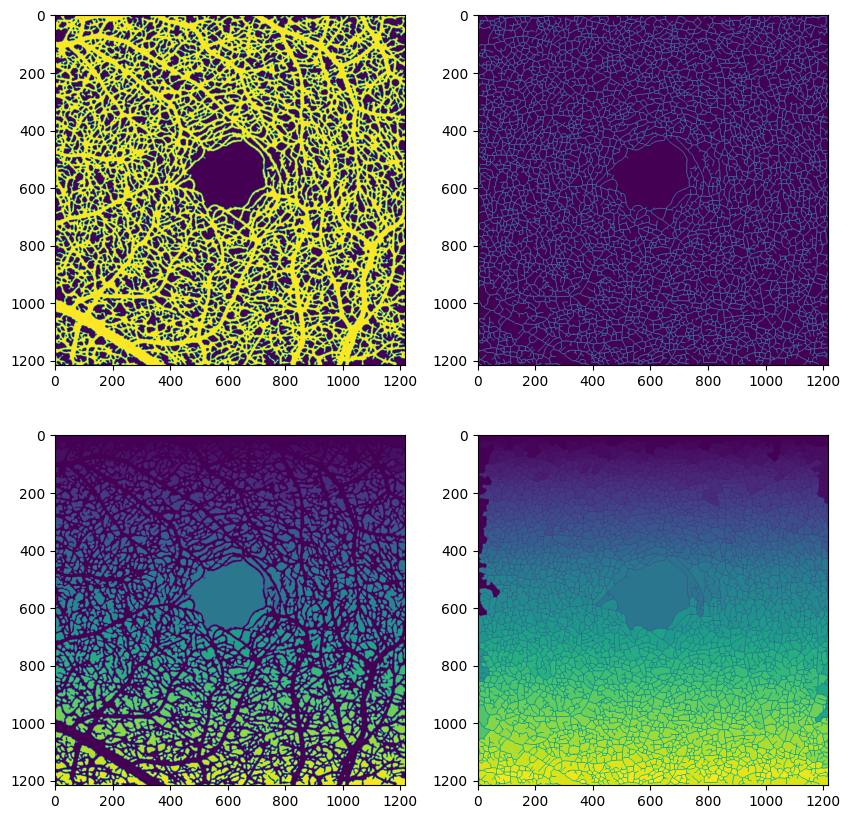

In [49]:


fig, ax = plt.subplots(2,2, figsize=(10,10))
seg = np.array(seg)
seg = seg.astype(np.uint8)

skeleton = skeletonize(morphology.remove_small_holes(seg, area_threshold=9, connectivity=1).astype("uint8"))
skeleton = skeletonize(seg)
skeleton = skeleton.astype(np.uint8)

print(skeleton.dtype)

ax[0,0].imshow(seg)
ax[0,1].imshow(skeleton)

# regions should stay the same even after skeletonization

seg_labeled = measure.label(seg, background=255)
region_labels = measure.label(morphology.remove_small_holes(seg, area_threshold=9, connectivity=1).astype("uint8"), background=1)

skel_labeled = measure.label(skeleton, background=1, connectivity=1)

ax[1,0].imshow(region_labels)
ax[1,1].imshow(skel_labeled)

plt.show()



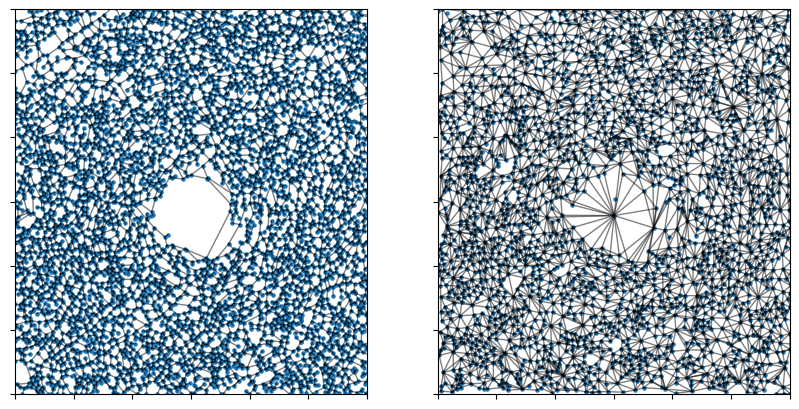

In [47]:

vessel_graph_loader_2_cls = data_loader.VesselLoaderTorch("/media/data/alex_johannes/octa_data/graphs", "/media/data/alex_johannes/octa_data/labels.xlsx", two_cls= True, create_line= False)
void_graph_loader_2_cls = data_loader.VesselLoaderTorch("/media/data/alex_johannes/octa_data/void_graphs", "/media/data/alex_johannes/octa_data/labels.xlsx", two_cls= True, create_line= False)


fig, ax = plt.subplots(1,2, figsize=(10,5))


# vessel and void have same orientation, but seem to be  hoizontally flipped compared to the seg
graph_2D.GraphPlotter2D(vessel_graph_loader_2_cls.full_data[10301]).plot_graph_2D(ax = ax[0])
graph_2D.GraphPlotter2D(void_graph_loader_2_cls.full_data[10301]).plot_graph_2D(ax = ax[1])
plt.show()

In [ ]:
octa500_loader_2_cls = data_loader.VesselLoaderTorch("/media/data/alex_johannes/octa_data/graphs", "/media/data/alex_johannes/octa_data/labels.xlsx", two_cls= True)


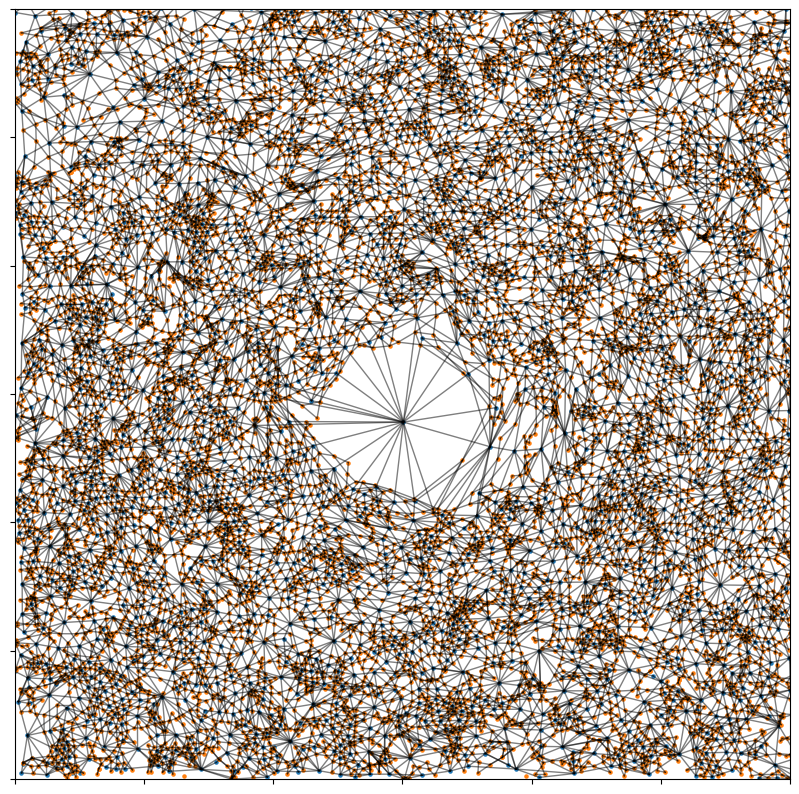

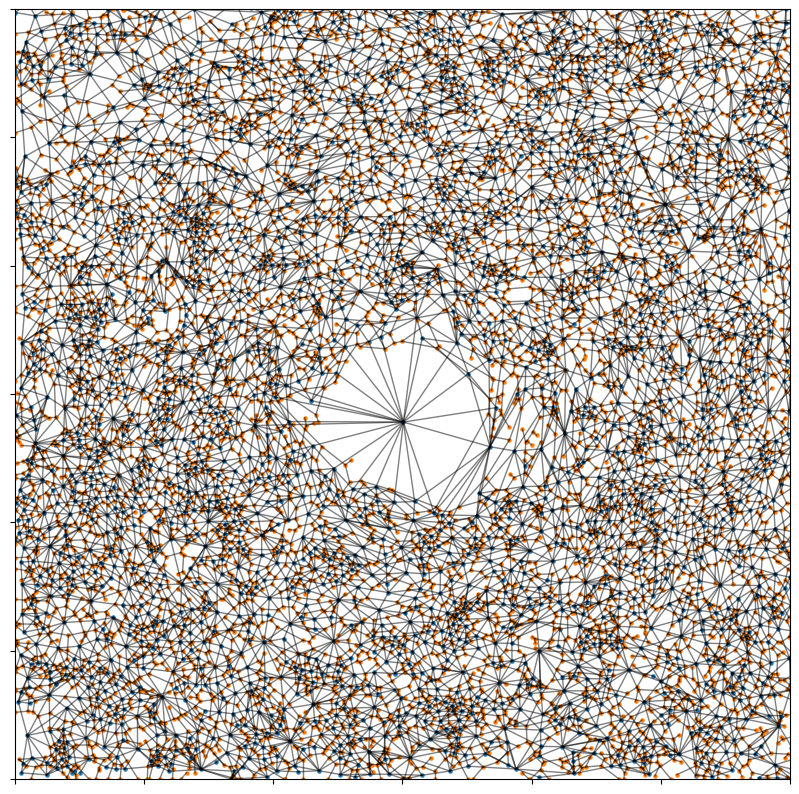

In [19]:

fig, ax = plt.subplots(figsize=(10,10))
# two points in the center because one region is the background(vessel)

# this is the line graph
graph_2D.GraphPlotter2D(region_graph_loader_2_cls.region_graphs[10301]).plot_graph_2D(ax = ax)
graph_2D.GraphPlotter2D(octa500_loader_2_cls.line_data[10301], line_G = True).plot_graph_2D(ax = ax)
plt.show()


fig, ax = plt.subplots(figsize=(10,10))
# two points in the center because one region is the background(vessel)

# this is the regular graph
graph_2D.GraphPlotter2D(region_graph_loader_2_cls.region_graphs[10301]).plot_graph_2D(ax = ax)
graph_2D.GraphPlotter2D(octa500_loader_2_cls.full_data[10301]).plot_graph_2D(ax = ax)
plt.show()

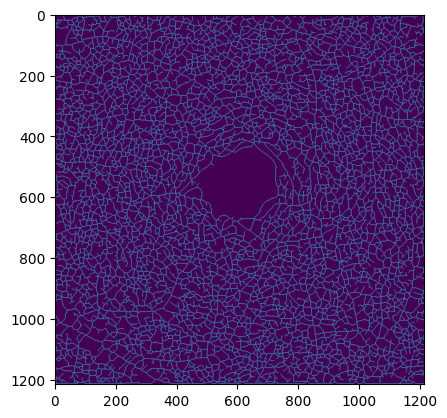

2723


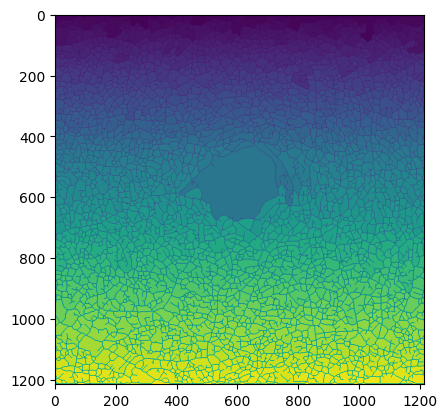

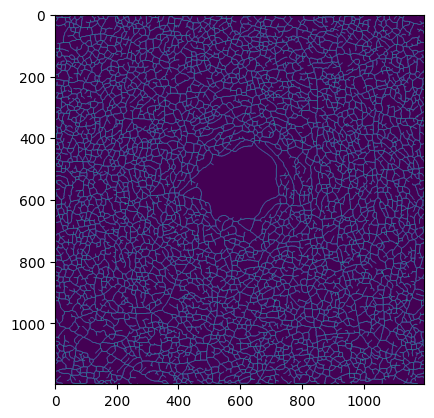

2527


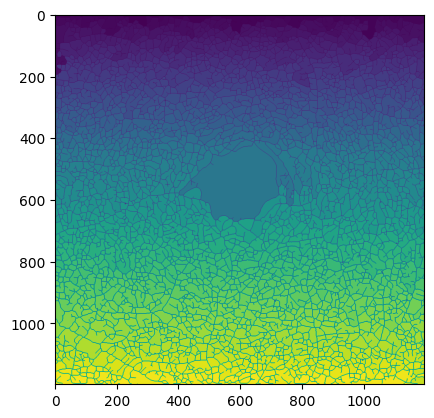

In [ ]:
crop_val = 9

skeleton_alt = skeletonize(seg[crop_val:-crop_val, crop_val:-crop_val])


seg_work = seg.copy()
# make all border pixels 1
seg_work[0,:] = 255
seg_work[-1,:] = 255
seg_work[:,0] = 255
seg_work[:,-1] = 255

skeleton_border = skeletonize(seg_work)

plt.imshow(skeleton_border==1)
plt.show()


skel_labeled = measure.label(skeleton_border, background=1, connectivity=1)

print(len(np.unique(skel_labeled)))
plt.imshow(skel_labeled)
plt.show()



plt.imshow(skeleton_alt==1)
plt.show()

skeleton_alt = skeleton_alt.astype(np.uint8)

# regions should stay the same even after skeletonization

skel_labeled = measure.label(skeleton_alt, background=1, connectivity=1)

print(len(np.unique(skel_labeled)))

plt.imshow(skel_labeled)
plt.show()